<a href="https://colab.research.google.com/github/GraceHerchenroder/Neuro265/blob/main/final%20project/final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

###Grace Herchenroder
*Neuro265: Neural Data Analysis*

In [60]:
# Import relevant details

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statistics as st

## **Gender**: Number of AT8 vs pTDP43 positive cells in grey matter

In [44]:
# Upload relevant files

alzheimer_data = pd.read_csv('https://raw.githubusercontent.com/GraceHerchenroder/Neuro265/main/final%20project/alzheimers_pathology_final_project.csv')
alzheimer_ID = pd.read_excel('https://raw.githubusercontent.com/GraceHerchenroder/Neuro265/main/final%20project/alzheimers_IDs_final_project.xlsx')

In [45]:
# Separating donor IDs

donor_ID = alzheimer_ID['Donor ID']
donor_ID_data = alzheimer_data['Donor ID']
sex_ID = alzheimer_ID['Sex']

female_ID = donor_ID[sex_ID == 'Female']
male_ID = donor_ID[sex_ID == 'Male']

print('Male donors:', male_ID.size)
print('Female donors:', female_ID.size)

Male donors: 33
Female donors: 51


In [46]:
# Separating relevant data by gender
# AT8 Protein
AT8 = alzheimer_data['number of AT8 positive cells_Grey matter']

AT8_female = np.zeros(len(female_ID))
AT8_male = np.zeros(len(male_ID))

for i in range(len(female_ID)):
  AT8_female[i] = AT8[donor_ID_data == female_ID.iloc[i]]
for i in range(len(male_ID)):
  AT8_male[i] = AT8[donor_ID_data == male_ID.iloc[i]]

# pTDP43 Protein
pTDP43 = alzheimer_data['number of pTDP43 positive cells_Grey matter']
pTDP43_female = np.zeros(len(female_ID))
pTDP43_male = np.zeros(len(male_ID))
for i in range(len(female_ID)):
  pTDP43_female[i] = pTDP43[donor_ID_data == female_ID.iloc[i]]
for i in range(len(male_ID)):
  pTDP43_male[i] = pTDP43[donor_ID_data == male_ID.iloc[i]]

<ipython-input-46-f015ed9511b8>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  AT8_female[i] = AT8[donor_ID_data == female_ID.iloc[i]]
<ipython-input-46-f015ed9511b8>:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  AT8_male[i] = AT8[donor_ID_data == male_ID.iloc[i]]
<ipython-input-46-f015ed9511b8>:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pTDP43_female[i] = pTDP43[donor_ID_data == female_ID.iloc[i]]
<ipython-input-46-f015ed9511b8>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pTDP43_male[i] = pTDP43[donor_ID_data == male_ID.iloc[i]]


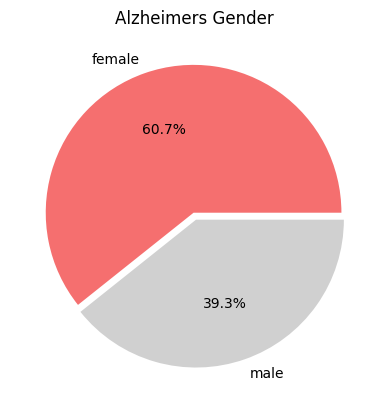

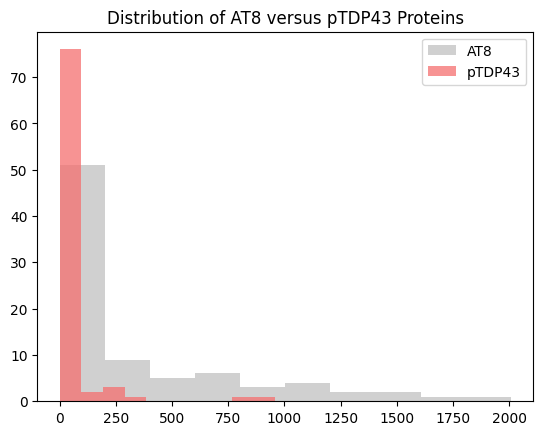

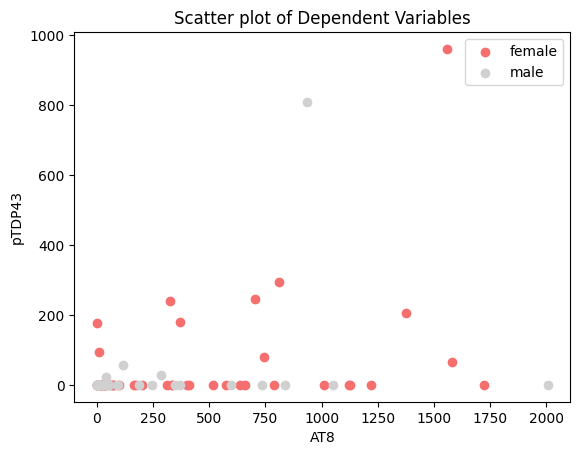

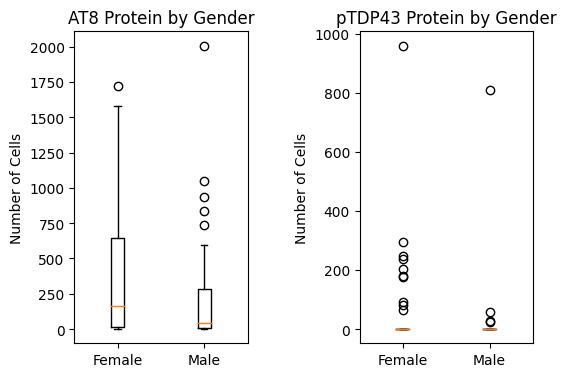

In [47]:
# Visualizing Distribution for Gender grouping

plt.pie(alzheimer_ID['Sex'].value_counts(), explode = [0.025, 0.025], labels = ['female', 'male'], colors = ['#f56f6f', '#d0d0d0'], autopct='%1.1f%%')
plt.title('Alzheimers Gender')
plt.show()

plt.hist(AT8, color = '#d0d0d0', bins = 10)
plt.hist(pTDP43, color = '#f56f6f', bins = 10, alpha = 0.75)
plt.title('Distribution of AT8 versus pTDP43 Proteins')
plt.legend(['AT8', 'pTDP43'])
plt.show()

plt.scatter(AT8_female, pTDP43_female, color = '#f56f6f')
plt.scatter(AT8_male, pTDP43_male, color = '#d0d0d0')
plt.xlabel('AT8')
plt.ylabel('pTDP43')
plt.title('Scatter plot of Dependent Variables')
plt.legend(['female', 'male'])
plt.show()

fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=5.0)
ax[0].boxplot([AT8_female, AT8_male], labels=['Female', 'Male'])
ax[0].set_title('AT8 Protein by Gender')
ax[0].set_ylabel('Number of Cells')
ax[1].boxplot([pTDP43_female, pTDP43_male], labels=['Female', 'Male'])
ax[1].set_title('pTDP43 Protein by Gender')
ax[1].set_ylabel('Number of Cells')
plt.show()

In [76]:
# Testing skewness
stat_AT8, p_AT8 = stats.skewtest(AT8)
stat_pTDP43, p_pTDP43 = stats.skewtest(pTDP43)

print('Significant Skew for AT8:', p_AT8)
print('Significant Skew for pTDP43', p_pTDP43)
print('')

# Correlation
def autocorr(x, y):
    xcorr = np.correlate(x, y, 'full')  # Compute the autocorrelation
    xcorr = xcorr[xcorr.size//2:] / xcorr.max()               # Convert to correlation coefficients
    return xcorr
corr_total_1 = autocorr(AT8, pTDP43)
corr_female = autocorr(AT8_female, pTDP43_female)
corr_male = autocorr(AT8_male, pTDP43_male)
print('Correlation for Female:',st.mean(corr_female))
print('Correlation for Male:',st.mean(corr_male))
print('Correlation Total:',st.mean(corr_total_1))

Significant Skew for AT8: 6.815521551418227e-07
Significant Skew for pTDP43 1.0238562181906658e-18

Correlation for Female: 0.143759880342723
Correlation for Male: 0.12859713806131218
Correlation Total: 0.23585240952711375


## **Dementia**:  GFAP and NeuN areas analyzed in Grey Matter

In [49]:
cognitive_ID = alzheimer_ID['Cognitive Status']

dementia_ID = donor_ID[cognitive_ID == 'No dementia']
none_ID = donor_ID[cognitive_ID == 'Dementia']

print(dementia_ID.size)
print(none_ID.size)

42
42


In [50]:
# Separating relevant data by cognitive status
# GFAP Protein
GFAP = alzheimer_data['GFAP area analyzed_Grey matter']

GFAP_dementia = np.zeros(len(dementia_ID))
GFAP_none = np.zeros(len(none_ID))

for i in range(len(dementia_ID)):
  GFAP_dementia[i] = GFAP[donor_ID_data == dementia_ID.iloc[i]]
for i in range(len(none_ID)):
  GFAP_none[i] = GFAP[donor_ID_data == none_ID.iloc[i]]

# NeuN Protein
Neun = alzheimer_data['NeuN area analyzed_Grey matter']

Neun_dementia = np.zeros(len(dementia_ID))
Neun_none = np.zeros(len(none_ID))

for i in range(len(dementia_ID)):
  Neun_dementia[i] = Neun[donor_ID_data == dementia_ID.iloc[i]]
for i in range(len(none_ID)):
  Neun_none[i] = Neun[donor_ID_data == none_ID.iloc[i]]

<ipython-input-50-2cf51d35aa15>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  GFAP_dementia[i] = GFAP[donor_ID_data == dementia_ID.iloc[i]]
<ipython-input-50-2cf51d35aa15>:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  GFAP_none[i] = GFAP[donor_ID_data == none_ID.iloc[i]]
<ipython-input-50-2cf51d35aa15>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Neun_dementia[i] = Neun[donor_ID_data == dementia_ID.iloc[i]]
<ipython-input-50-2cf51d35aa15>:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Neun_none[i] = Neun[donor_ID_data == none_ID.iloc[i]]


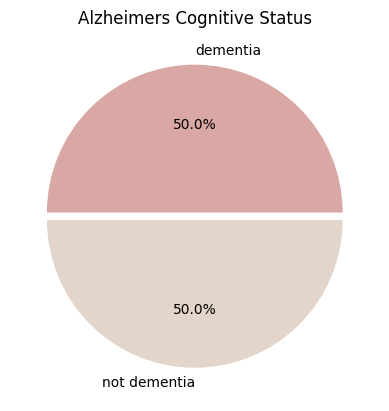

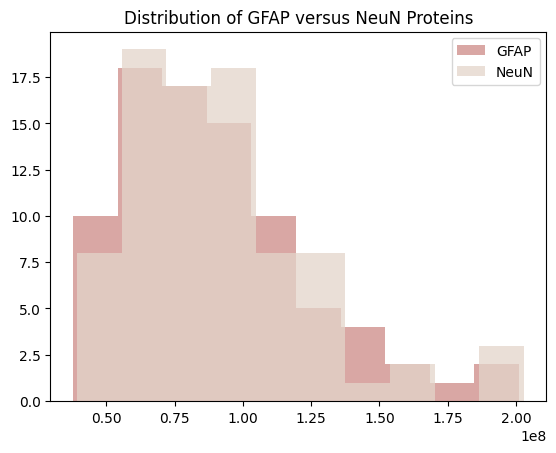

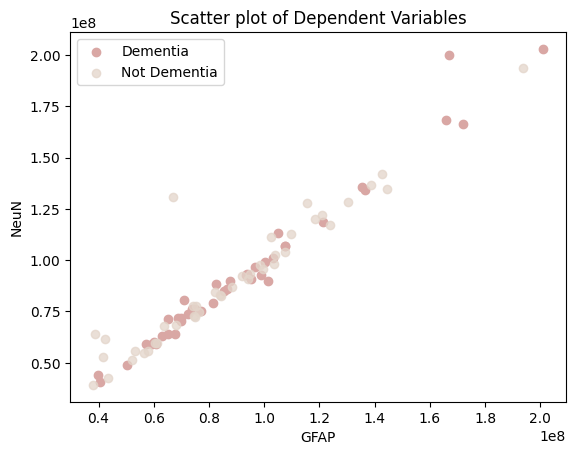

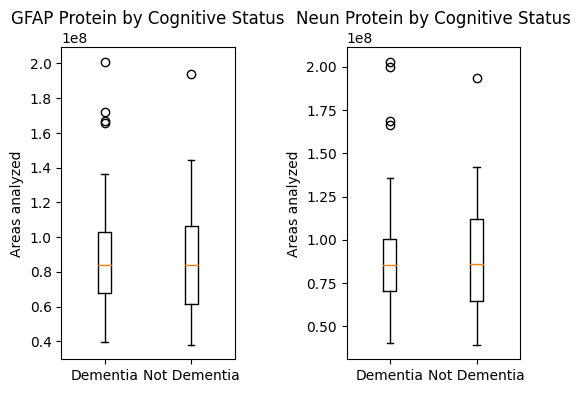

In [51]:
# Visualization Distribution for Dementia grouping
plt.pie(alzheimer_ID['Cognitive Status'].value_counts(), explode = [0.025, 0.025], labels = ['dementia', 'not dementia'], colors = ['#d9a7a4', '#e3d5ca'], autopct='%1.1f%%')
plt.title('Alzheimers Cognitive Status')
plt.show()

plt.hist(GFAP, color = '#d9a7a4', bins = 10)
plt.hist(Neun, color = '#e3d5ca', bins = 10, alpha = 0.75)
plt.title('Distribution of GFAP versus NeuN Proteins')
plt.legend(['GFAP', 'NeuN'])
plt.show()

plt.scatter(GFAP_dementia, Neun_dementia, color = '#d9a7a4')
plt.scatter(GFAP_none, Neun_none, color = '#e3d5ca', alpha = 0.75)
plt.xlabel('GFAP')
plt.ylabel('NeuN')
plt.title('Scatter plot of Dependent Variables')
plt.legend(['Dementia', 'Not Dementia'])
plt.show()

fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=5.0)
ax[0].boxplot([GFAP_dementia, GFAP_none], labels=['Dementia', 'Not Dementia'])
ax[0].set_title('GFAP Protein by Cognitive Status')
ax[0].set_ylabel('Areas analyzed')
ax[1].boxplot([Neun_dementia, Neun_none], labels=['Dementia', 'Not Dementia'])
ax[1].set_title('Neun Protein by Cognitive Status')
ax[1].set_ylabel('Areas analyzed')
plt.show()

In [75]:
# Testing skewness (statistics)
stat_GFAP, p_GFAP = stats.skewtest(GFAP)
stat_Neun, p_Neun = stats.skewtest(Neun)

print('Significant Skew GFAP:', p_GFAP)
print('Significant Skew NeuN:', p_Neun)
print('')

# Correlation (spikes)
def autocorr(x, y):
    xcorr = np.correlate(x, y, 'full')  # Compute the autocorrelation
    xcorr = xcorr[xcorr.size//2:] / xcorr.max()               # Convert to correlation coefficients
    return xcorr

corr_total_2 = autocorr(GFAP, Neun)
corr_dementia = autocorr(GFAP_dementia, Neun_dementia)
corr_none = autocorr(GFAP_none, Neun_none)
print('Correlation for Dementia:', st.mean(corr_dementia))
print('Correlation for No dementia:', st.mean(corr_none))
print('Correlation Total:',st.mean(corr_total_2))

Significant Skew GFAP: 0.00042406401595818213
Significant Skew NeuN: 6.526303879773166e-05

Correlation for Dementia: 0.4471288524465013
Correlation for No dementia: 0.462402907555877
Correlation Total: 0.44441564734126526
